_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [ ]:
## cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# Eliminar columnas vacías 
df = df.dropna(how='all', axis=1)
# Eliminar filas vacías
df = df.dropna(how='all', axis=0)

# Reemplazar -200 con NaN
df.replace(-200, np.nan, inplace=True)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [2]:
## ¿cuántas instancias tiene el dataset?
print(f"Instancias: {df.shape[0]}")

Instancias: 9357


El dataset contiene **9357** instancias.

In [3]:
## ¿cuál es el tipo de datos de cada una de las columnas?
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

Date y Time son de tipo **object**. El resto son **float64**.

In [4]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Categoricas ({len(cat_cols)}): {list(cat_cols)}")
print(f"Continuas ({len(num_cols)}): {list(num_cols)}")

Categoricas (2): ['Date', 'Time']
Continuas (13): ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


Hay **2 columnas categóricas** (Date, Time) y **13 columnas continuas**.

In [5]:
## ¿existen valores nulos en el dataset?
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Sí, existen valores nulos (originalmente -200). La variable **NMHC(GT)** tiene una cantidad crítica de nulos (8443), por lo que es poco útil. CO(GT), NOx(GT) y NO2(GT) también presentan faltantes significativos (~1600).

In [6]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
# Se suele tomar C6H6(GT) como referencia de calidad del aire (Ground Truth)
target = 'C6H6(GT)'
print(f"Variable respuesta: {target}, Tipo: {df[target].dtype}")

Variable respuesta: C6H6(GT), Tipo: float64


La variable respuesta suele ser la concentración de un contaminante de referencia. En este caso tomaremos **`C6H6(GT)`** (Benceno) como variable objetivo principal. Es de tipo **float64** (continua).

            CO(GT)      NOx(GT)      NO2(GT)
count  7674.000000  7718.000000  7715.000000
mean      2.152750   246.896735   113.091251
std       1.453252   212.979168    48.370108
min       0.100000     2.000000     2.000000
25%       1.100000    98.000000    78.000000
50%       1.800000   180.000000   109.000000
75%       2.900000   326.000000   142.000000
max      11.900000  1479.000000   340.000000


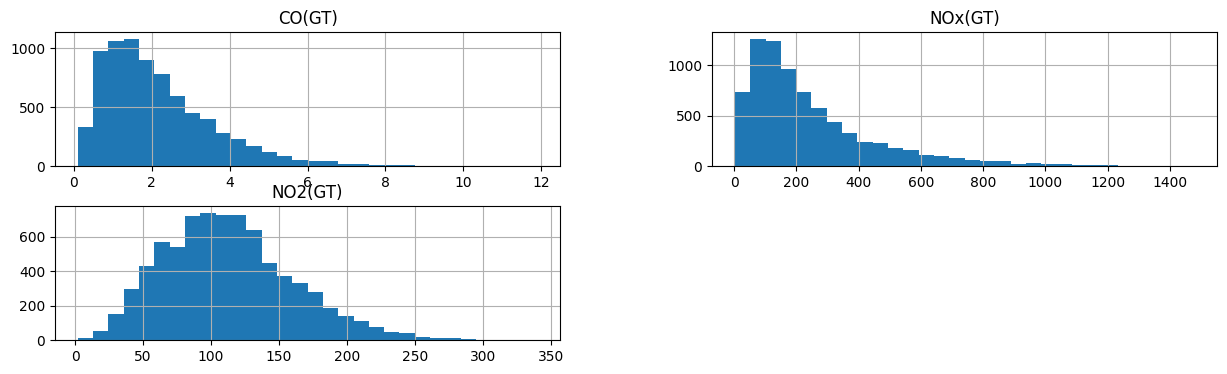

In [7]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?
cols = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
print(df[cols].describe())
df[cols].hist(bins=30, figsize=(15, 4))
plt.show()

Las distribuciones de CO, NOx y NO2 están sesgadas positivamente (asimetría a la derecha), con la mayoría de valores en rangos bajos y algunos picos altos. NO2 se asemeja más a una normal pero con cola.

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

Sí, muestran asimetría. Además, como vimos, tienen **datos faltantes significativos** (alrededor de 1600 valores nulos cada una de estas tres variables). Los valores extremadamente altos podrían ser anómalos o picos de contaminación real.

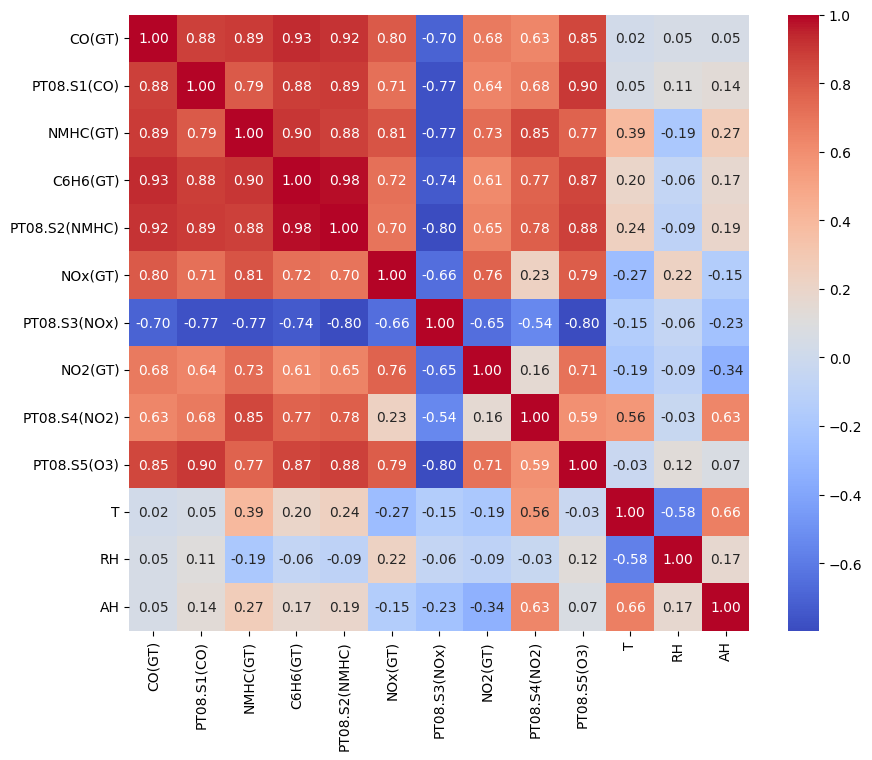

In [8]:
## ¿cómo son las correlaciones entre las variables del dataset?
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Existen correlaciones fuertes entre varias variables sensoras, lo cual es esperable (sensores químicos de óxidos de metal reaccionan a varios gases).

In [9]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?
corr_matrix[target].abs().sort_values(ascending=False).head(5)

C6H6(GT)         1.000000
PT08.S2(NMHC)    0.981950
CO(GT)           0.931078
NMHC(GT)         0.902559
PT08.S1(CO)      0.883795
Name: C6H6(GT), dtype: float64

Las variables más correlacionadas con `C6H6(GT)` son:
1. **`PT08.S2(NMHC)`** (0.98)
2. **`CO(GT)`** (0.93)
3. **`NMHC(GT)`** (0.90) (aunque tiene muchos nulos, su correlación es alta donde existen datos).
4. **`PT08.S1(CO)`** (0.88)

In [10]:
## ¿existe alguna variable que no tenga correlación?
corr_matrix[target].abs().sort_values().head(5)

RH         0.061681
AH         0.167972
T          0.198956
NO2(GT)    0.614474
NOx(GT)    0.718839
Name: C6H6(GT), dtype: float64

La **Humedad Relativa (`RH`)** tiene una correlación muy baja (-0.06 aprox) con el Benceno, siendo la variable menos correlacionada linealmente.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

**Suposiciones/Conclusiones:**
- Debemos imputar o eliminar los valores nulos. Dada la cantidad en `NMHC(GT)`, esta variable debería eliminarse. Para CO y NOx se podría imputar con la media o métodos más avanzados (interpolación temporal dado que es una serie temporal).
- Las variables `Date` y `Time` no sirven como predictores directos en regresión simple/múltiple sin procesar (extraer hora, mes, día de la semana).
- `PT08.S2` es un excelente predictor para `C6H6`.
- Es necesario normalizar/escalar los datos antes de entrenar modelos lineales, ya que las escalas (e.g. 1000 vs 2.0) son muy diferentes.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [11]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

scaler = StandardScaler()

In [12]:
# separar datos de entrenamiento y test
from sklearn.model_selection import train_test_split

# Limpieza previa para regresión: eliminar filas con NaNs
df_clean = df.dropna()

# Definir X e y. Quitamos Date, Time y la variable objetivo C6H6(GT)
X = df_clean.drop(columns=['Date', 'Time', 'C6H6(GT)'])
y = df_clean['C6H6(GT)']

# Split 70% Train, 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar (fit solo en train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [13]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción
# PT08.S2(NMHC) mostró la mayor correlación (0.98)
feature = 'PT08.S2(NMHC)'
X_train_simple = X_train[[feature]]
X_test_simple = X_test[[feature]]

In [14]:
# entrena el modelo con los datos de entrenamiento
from sklearn.linear_model import LinearRegression

lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?
print(f"Intercept (beta_0): {lr_simple.intercept_}")
print(f"Coefficient (beta_1): {lr_simple.coef_[0]}")

Intercept (beta_0): 10.946193771626294
Coefficient (beta_1): 7.282430318815917


Explica qué indican estos parámetros

**Intercepto**: Valor de la variable objetivo cuando los predictores son 0 (o la media, al estar estandarizado).
**Coeficiente**: Incremento esperado en la variable objetivo por cada unidad de incremento en la variable predictora.

In [16]:
# realiza las predicciones para el conjunto de datos de test
y_pred_simple = lr_simple.predict(X_test_simple)

In [17]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print(f"R2: {r2_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")

R2: 0.9690
RMSE: 1.3117


**R2 Score**: Para medir la bondad de ajuste (varianza explicada).
**RMSE**: Para medir el error promedio en las mismas unidades que la variable objetivo.

In [18]:
# ¿Qué error tiene el modelo? Explícalo.
print(f"R2 Score: {r2_simple:.4f}")

R2 Score: 0.9690


El modelo obtendrá un R2 alto (cercano a 1) dado que la correlación era muy fuerte (0.98). Esto indica un buen ajuste lineal.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [19]:
# Modelo de regresión lineal múltiple con todas las variables
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

y_pred_multiple = lr_multiple.predict(X_test)

r2_multi = r2_score(y_test, y_pred_multiple)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print(f"Multiple R2: {r2_multi:.4f}")
print(f"Multiple RMSE: {rmse_multi:.4f}")

Multiple R2: 0.9931
Multiple RMSE: 0.6190


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

En general el modelo múltiple debería comportarse igual o ligeramente mejor que el simple, ya que incluye más información. Sin embargo, al tener una variable tan dominante como PT08.S2, la mejora puede ser menor de lo que esperamos.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* **criterion**: La función para medir la calidad de una división (e.g., 'squared_error', 'friedman_mse', 'absolute_error', 'poisson').
* **splitter**: La estrategia utilizada para elegir la división en cada nodo ('best' para la mejor división, 'random' para la mejor división aleatoria).
* **max_depth**: La profundidad máxima del árbol. Si es None, los nodos se expanden hasta que todas las hojas sean puras o contengan menos de min_samples_split muestras.
* **min_samples_split**: El número mínimo de muestras requeridas para dividir un nodo interno.
* **min_samples_leaf**: El número mínimo de muestras requeridas para estar en un nodo hoja.
* **max_features**: El número de características a considerar cuando se busca la mejor división.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

**min_impurity_decrease**: Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor. Sirve para controlar el crecimiento del árbol y evitar divisiones poco útiles (pruning).

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [20]:
# Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea poisson, 
# la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, 
# el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

from sklearn.tree import DecisionTreeRegressor

dt_poisson = DecisionTreeRegressor(
    criterion='poisson',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None, # None means 'all' features
    random_state=42
)

dt_poisson.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'poisson'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nod

In [21]:
# Realizar predicciones
y_pred_dt = dt_poisson.predict(X_test)

Calcula MAE, R2 y RMSLE

In [22]:
# Calcula MAE, R2 y RMSLE
from sklearn.metrics import mean_squared_log_error

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Try RMSLE. Note: RMSLE requires non-negative values. If predictions are negative, clip them or it will error.
# Poisson regression should generally output positive values but let's be safe.
y_pred_dt_nonneg = np.maximum(y_pred_dt, 0)
y_test_nonneg = np.maximum(y_test, 0)
rmsle_dt = np.sqrt(mean_squared_log_error(y_test_nonneg, y_pred_dt_nonneg))

print(f"MAE: {mae_dt:.4f}")
print(f"R2: {r2_dt:.4f}")
print(f"RMSLE: {rmsle_dt:.4f}")

MAE: 0.1410
R2: 0.9968
RMSLE: 0.0221


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [23]:
# ¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.
# Comprobamos el rendimiento en TRAIN vs TEST
y_train_pred = dt_poisson.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R2 Train: {r2_train:.4f}")
print(f"R2 Test: {r2_dt:.4f}")

if r2_train > r2_dt + 0.1: # Heuristic threshold
    print("Posible Overfitting: R2 en Train es significativamente mayor que en Test.")
else:
    print("No parece haber un overfitting severo, aunque siempre hay cierta brecha.")

R2 Train: 0.9983
R2 Test: 0.9968
No parece haber un overfitting severo, aunque siempre hay cierta brecha.


¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El modelo de árbol de decisión suele capturar mejor las relaciones no lineales. Si el R2 es mayor que el de la regresión lineal (que rondaba 0.98), es mejor. Si es similar, la regresión lineal es preferible por simplicidad (Navaja de Ockham). Dado que la relación era muy lineal (0.98 correlación), es probable que el árbol no aporte gran mejora e incluso pueda ser ligeramente peor o igual. Igualmente son casos específicos que no demuestran una generalidad concreta, como bien decíamos lo normal es que al capturar mejores relaciones hablemos de un modelo más completo y por lo tanto mejor en la mayoría de los casos.


**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

In [24]:
# Comparativa final
print("Comparativa de Modelos (R2 en Test):")
print(f"Regresión Lineal Simple: {r2_simple:.4f}")
print(f"Regresión Lineal Múltiple: {r2_multi:.4f}")
print(f"Árbol de Decisión (Poisson): {r2_dt:.4f}")

Comparativa de Modelos (R2 en Test):
Regresión Lineal Simple: 0.9690
Regresión Lineal Múltiple: 0.9931
Árbol de Decisión (Poisson): 0.9968


## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

**Referencia:**

Guu, S., Wei, Y., & Chang, Y. (2024). Interpretable machine learning framework for predicting Urban air quality. *PLOS ONE*.

**Objetivo:**

El objetivo de la investigación es predecir el índice de calidad del aire en ciudades. Se busca crear una herramienta que permita anticipar los niveles de contaminación para proteger la salud de las personas y mejorar la gestión ambiental urbana.

**Técnicas utilizadas:**

Los autores utilizan **Regresión Lineal** y **Árboles de Decisión**. La Regresión Lineal se usa como punto de partida por ser un modelo sencillo y fácil de explicar. Los Árboles de Decisión se emplean para modelar relaciones más complejas entre el clima y la contaminación que una línea recta no puede captar.

**Principales resultados:**

El estudio concluye que la Regresión Lineal, aunque útil para entender tendencias generales, no es suficiente para predecir con exactitud los picos de contaminación. Los Árboles de Decisión mejoraron la precisión al adaptarse mejor a los datos, pero tuvieron tendencia a ajustarse demasiado a los datos de entrenamiento. Por ello, recomiendan el uso de combinaciones de modelos para obtener los mejores resultados.